# TASK 2 - COLOR IDENTIFICATION 

## Name : ARNAV SHAH

### In this program, I have implemented Color Identification on images
- KMeans is used to extract colors from a given image and to identify them
- OpenCV2 is used for image manipulation 
- Matplotlib is used for plotting the information

#### Importing libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt      #for plotting graphs
import numpy as np                   #numpy to work with arrays
import cv2                           #to work with image data
from collections import Counter      #to count values
from skimage.color import rgb2lab,deltaE_cie76 #rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors
import os

#### Working on Image

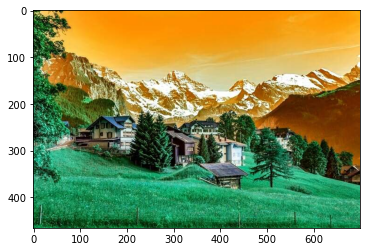

In [2]:
image = cv2.imread('swiss-alps.jpg')   #to read the image
plt.imshow(image)                      #to display the image
#by default the image is displayed in BGR 

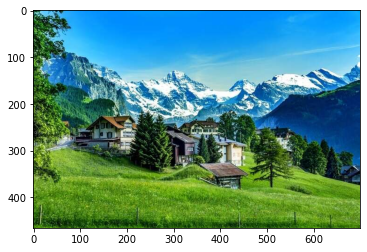

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting BGR to RGB
plt.imshow(image)

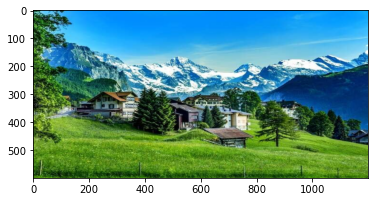

In [4]:
resized_image = cv2.resize(image, (1200, 600)) #resizing the image according to our need
plt.imshow(resized_image)

### Color Identification

In [5]:
#This function will give us the hex values of the colors we will identify.

In [1]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [2]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
#Reshaping the image using numpy,so that we can apply KMeans to first fit and then predict on the image to get the results

In [4]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 87.80319087, 135.27687202, 143.75206708]),
 array([20.40869208, 48.76046065, 23.56153002]),
 array([ 19.58663002, 156.84442088, 246.39276749]),
 array([120.62856898, 168.46120209,  53.02192118]),
 array([209.68009636, 232.38145871, 230.91236086]),
 array([ 12.60194864,  71.30381445, 118.42136405]),
 array([115.91507056, 194.44549251, 223.08334533]),
 array([ 74.33107466, 122.63244487,  30.1559734 ])]

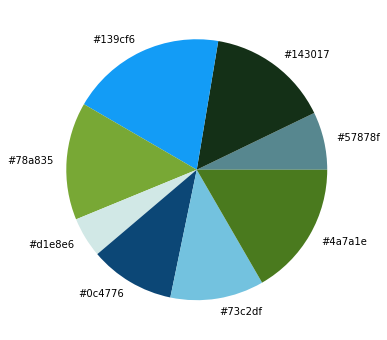

In [10]:
get_colors(get_image('swiss-alps.jpg'), 8, True)  #plotting the colors as a pie chart.

### Identification of images by Color
- From the model above, we extract the major colors which are Blue and Green majorly from the above chart
- By this we can search for images based on certain colors. 
- We select a color and if it's hex matches or is close to the hex of the major colors of the image,it will be a match.
- I have added hex for Yellow and Red so that we can test for more colors

In [11]:
#storing all the images in the same directory
IMAGE_DIRECTORY = 'images'
COLORS = {                                         #hex code for different colors
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[255, 0, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [12]:
#Displaying all the images present in the folder

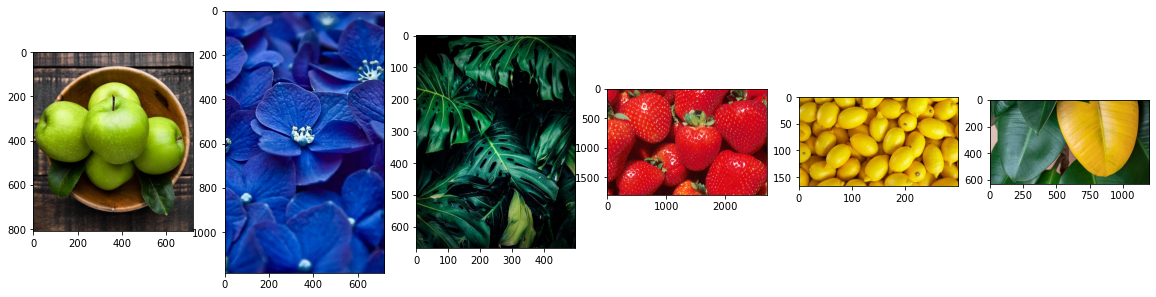

In [13]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

- There will be cases where no exact match is found for the hex codes, thus we calculate the similarity between the chosen color and the colors of the image.

- Therefore we will create a threshold value such that if the difference between the chosen color and any of the selected colors is less than that threshold, we declare it as a match.

In [14]:
#This method calculates the difference between all top 5 colors of the image 
#and the selected color and if atleast one is below the threshold, we show the image.
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]]))) # to convert the values
        diff = deltaE_cie76(selected_color, curr_color) #find the difference 
        if (diff < threshold):
            select_image = True
    
    return select_image

We will now call the above method for all the images in our set and show relevant images 

In [15]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

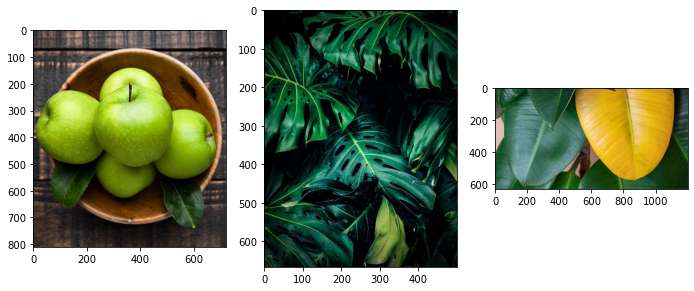

In [16]:
#Images for Green
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

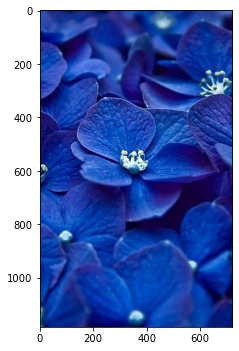

In [17]:
# Images for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

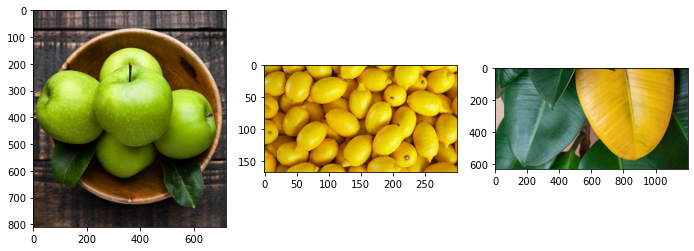

In [18]:
#Images for Yellow
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

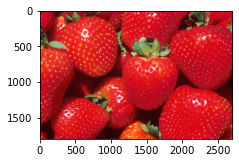

In [19]:
#Images for Red
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)